In [1]:
import tmdbsimple as tmdb
tmdb.API_KEY = "71e259894a515060876bab2a33d6bdc9"

In [2]:
import imdb as ib
from imdb import IMDb
import pandas as pd
from PIL import Image
from StringIO import StringIO
import requests
import os
import time
from shutil import copyfile
import types
import numpy as np

In [3]:
dir_python_notebook = os.getcwd()
dir_movie_project = os.path.abspath(os.path.join(dir_python_notebook, os.pardir))
dir_data = os.path.join(dir_movie_project, 'data')

**API code to access the genre and movie poster path of your favorite movie**

In [4]:
#use the api to get poster image 
CONFIG_PATTERN = 'http://api.themoviedb.org/3/configuration?api_key={key}'
url = CONFIG_PATTERN.format(key=tmdb.API_KEY)
r = requests.get(url)
config = r.json()
#find the base url for posters, and available poster sizes
base_url = config['images']['base_url']
sizes = config['images']['poster_sizes']

In [5]:
#all genre dictionary list
search = tmdb.Search()
favorite = search.movie(query='Forrest gump')
print(tmdb.Genres(search.results[0]['genre_ids']).list().values())

[[{u'id': 28, u'name': u'Action'}, {u'id': 12, u'name': u'Adventure'}, {u'id': 16, u'name': u'Animation'}, {u'id': 35, u'name': u'Comedy'}, {u'id': 80, u'name': u'Crime'}, {u'id': 99, u'name': u'Documentary'}, {u'id': 18, u'name': u'Drama'}, {u'id': 10751, u'name': u'Family'}, {u'id': 14, u'name': u'Fantasy'}, {u'id': 36, u'name': u'History'}, {u'id': 27, u'name': u'Horror'}, {u'id': 10402, u'name': u'Music'}, {u'id': 9648, u'name': u'Mystery'}, {u'id': 10749, u'name': u'Romance'}, {u'id': 878, u'name': u'Science Fiction'}, {u'id': 10770, u'name': u'TV Movie'}, {u'id': 53, u'name': u'Thriller'}, {u'id': 10752, u'name': u'War'}, {u'id': 37, u'name': u'Western'}]]


In [6]:
#create a new dictionary to match genre names
tmdb_genres = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80:'Crime', 99: 'Documentary', 18:'Drama',
              10751: 'Family', 14:'Fantasy', 36: 'History', 27:'Horror', 10402: 'Music', 9648:'Mystery',
              10749:'Romance', 878:'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

In [7]:
#movie_poster_genre: a function to return movie poster url and genres
#Argument: 
#    favorite: string of the movie
#Return:
#    url: of the movie poster
#    genres: a list of the movie genres
def movie_poster_genre(favorite):
    #search favorite movie in TMDB
    search = tmdb.Search()
    favorite = search.movie(query = favorite)
    favo_path = search.results[0]['poster_path']
    base_url = 'http://image.tmdb.org/t/p/'
    #find the url of poster
    favo_url = "{0}{1}{2}".format(base_url, 'original', favo_path)
    genres = [tmdb_genres[x] for x in search.results[0]['genre_ids']]
    return favo_url, genres

('The genres for Forrest gump are:', ['Comedy', 'Drama', 'Romance'])


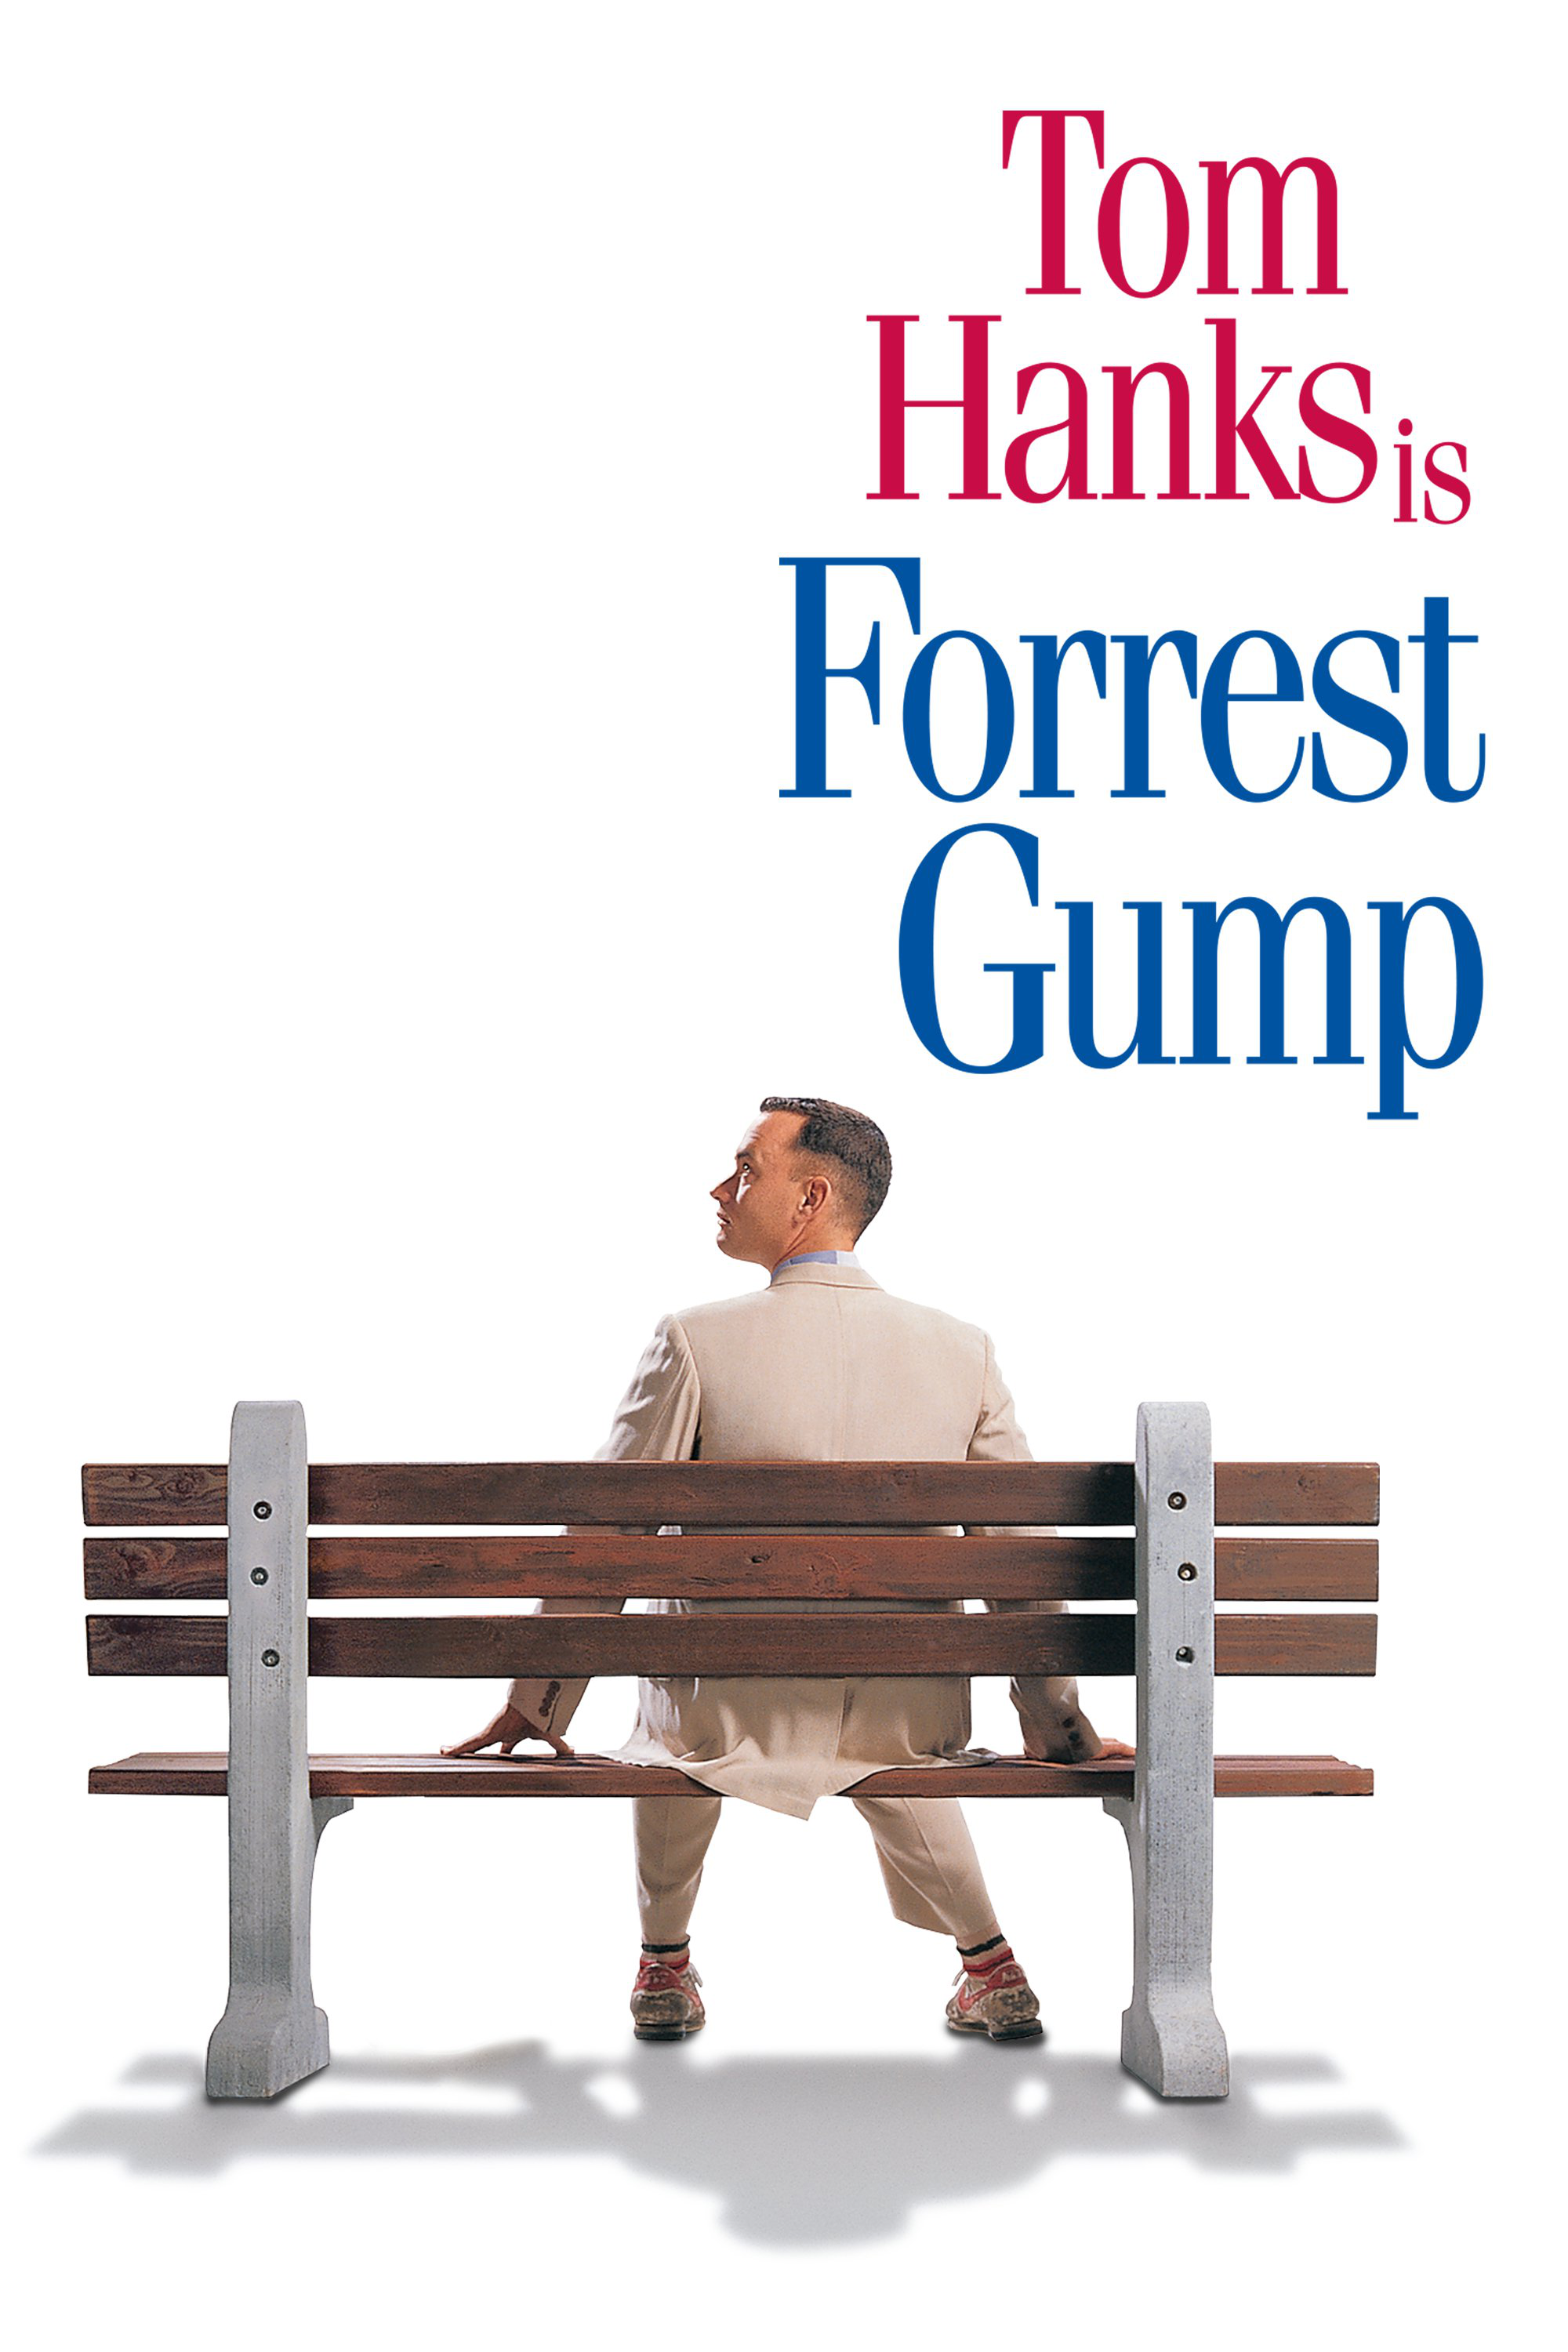

In [8]:
favorite_movie = 'Forrest gump'
favo_url, favo_genre = movie_poster_genre(favorite_movie)
print("The genres for "+favorite_movie+ ' are:',favo_genre)
poster = requests.get(favo_url)
Image.open(StringIO(poster.content))

**Genre for this movie listed by TMDb and IMDb**

In [9]:
#genres for this movie are obtained from previous step:
print("The genres from TMDB for "+favorite_movie+ ' are:',favo_genre)

('The genres from TMDB for Forrest gump are:', ['Comedy', 'Drama', 'Romance'])


In [10]:
imdb = IMDb()
favo_matchmost = imdb.search_movie(favorite_movie)[0]
print favo_matchmost.summary()

Movie
=====
Title: Forrest Gump (1994)



In [11]:
imdb.update(favo_matchmost)
print("The genres from IMDB for "+favorite_movie+ ' are:',favo_matchmost['genres'])

('The genres from IMDB for Forrest gump are:', [u'Comedy', u'Drama', u'Romance'])


**A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API**

In [12]:
discover = tmdb.Discover()
#response = discover.movie(year = 2016, sort_by = 'popularity.desc')
response = discover.movie(primary_release_year = 2016, sort_by = 'popularity.desc')

In [13]:
top10_popmovie = pd.DataFrame(columns=['title','id','release_date','popularity','genre'])

In [14]:
for ind, s in enumerate(discover.results[0:10]):
    top10_popmovie.loc[ind] =[s['title'], s['id'], s['release_date'], s['popularity'],[tmdb_genres[x] for x in s['genre_ids']]]

In [151]:
top10_popmovie

,title,id,release_date,popularity,genre
0,Sing,335797.0,2016-11-23,86.471049,"[Animation, Comedy, Drama, Family, Music]"
1,Finding Dory,127380.0,2016-06-16,46.808664,"[Animation, Adventure, Comedy, Family]"
2,Fantastic Beasts and Where to Find Them,259316.0,2016-11-16,45.124577,"[Action, Adventure, Fantasy]"
3,Rogue One: A Star Wars Story,330459.0,2016-12-14,34.992299,"[Action, Drama, Science Fiction, War]"
4,Arrival,329865.0,2016-11-10,34.393357,"[Drama, Science Fiction]"
5,Doctor Strange,284052.0,2016-10-25,26.273352,"[Action, Adventure, Fantasy, Science Fiction]"
6,Deadpool,293660.0,2016-02-09,26.060669,"[Action, Adventure, Comedy, Romance]"
7,Captain America: Civil War,271110.0,2016-04-27,25.896804,"[Action, Science Fiction]"
8,Underworld: Blood Wars,346672.0,2016-11-28,23.826580,"[Action, Horror]"
9,Zootopia,269149.0,2016-02-11,21.488152,"[Animation, Adventure, Family, Comedy]"


**Notes: How to access movie information from IMDB, TMDB**

(You can delete all the information below when submit the milestone 1, it is only used to help you get the information easier)

More information from: 

TMDBSIMPLE: https://github.com/celiao/tmdbsimple 

TMDB API: https://www.themoviedb.org/documentation/api

IMDBPY: http://imdbpy.sourceforge.net/

**1. Search by movie names and get desired attributes:**

In [257]:
#IMDB
imdb = IMDb()
#search by movie_name, [0] is the most closed one
imdb_movie = imdb.search_movie('Forrest Gump')[0]
#access attributes of the movie by dictionary keys
imdb.update(imdb_movie)
#available keys
print imdb_movie.keys()
#for example, get director of the movie
imdb_movie['director']

[u'music department', 'sound crew', 'camera and electrical department', u'distributors', 'rating', 'runtimes', 'costume designer', u'thanks', 'make up', 'year', 'production design', 'miscellaneous crew', 'color info', u'casting department', 'languages', 'votes', 'producer', 'title', 'mpaa', 'assistant director', 'writer', 'production manager', 'casting director', 'visual effects', 'top 250 rank', 'set decoration', 'editor', 'certificates', u'costume department', 'country codes', 'language codes', 'cover url', u'special effects department', 'special effects companies', 'sound mix', u'location management', 'genres', u'production companies', 'stunt performer', 'miscellaneous companies', 'cinematographer', 'art direction', 'akas', 'aspect ratio', 'director', 'kind', u'art department', 'countries', u'transportation department', 'plot outline', 'plot', 'cast', 'original music', u'editorial department', 'canonical title', 'long imdb title', 'long imdb canonical title', 'smart canonical title'

[<Person id:0000709[http] name:_Zemeckis, Robert_>]

In [260]:
#TMDB search by movie name
search = tmdb.Search()
tmdb_movie = search.movie(query = 'Forrest Gump')
#avilable attributes
print search.results[0].keys()
#for example, get vote_average of the movie
search.results[0]['vote_average']

[u'poster_path', u'title', u'overview', u'release_date', u'popularity', u'original_title', u'backdrop_path', u'vote_count', u'video', u'adult', u'vote_average', u'original_language', u'id', u'genre_ids']


8.1

In [270]:
#TMDB search by movie id
tmdb_movie_id = tmdb.Movies(603)
movie_info = tmdb_movie_id.info()
#information contained 
print tmdb_movie_id.info()
#specific attribute, for example, genre
print tmdb_movie_id.info()['genres']

{u'poster_path': u'/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg', u'production_countries': [{u'iso_3166_1': u'AU', u'name': u'Australia'}, {u'iso_3166_1': u'US', u'name': u'United States of America'}], u'revenue': 463517383, u'overview': u'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.', u'video': False, u'id': 603, u'genres': [{u'id': 28, u'name': u'Action'}, {u'id': 878, u'name': u'Science Fiction'}], u'title': u'The Matrix', u'tagline': u'Welcome to the Real World.', u'vote_count': 7194, u'homepage': u'http://www.warnerbros.com/matrix', u'belongs_to_collection': {u'backdrop_path': u'/RhUxjzNojIJsdZSYTn0CQvdKsn.jpg', u'poster_path': u'/lh4aGpd3U9rm9B8Oqr6CUgQLtZL.jpg', u'id': 2344, u'name': u'The Matrix Collection'}, u'original_language': u'en', u'status': u'Released', u'spoken_languages': [{u'iso_639_1': u'en', u'name': u'English'}], u'imdb_id': u'tt0133093', u'

In [282]:
#TMDB search by specific interests: 
tmdb_movie_discover = tmdb.Discover()
movie_discover = tmdb_movie_discover.movie(primary_release_year = 2016, language = 'en')
#the first three movie matching specific interest
print tmdb_movie_discover.results[0:3]
#information contained in the first movie
print tmdb_movie_discover.results[0].keys()
#get popularity of a specific movie
tmdb_movie_discover.results[0]['popularity']

[{u'poster_path': u'/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg', u'title': u'Sing', u'overview': u'A koala named Buster recruits his best friend to help him drum up business for his theater by hosting a singing competition.', u'release_date': u'2016-11-23', u'popularity': 86.471049, u'original_title': u'Sing', u'backdrop_path': u'/fxDXp8un4qNY9b1dLd7SH6CKzC.jpg', u'vote_count': 937, u'video': False, u'adult': False, u'vote_average': 6.7, u'original_language': u'en', u'id': 335797, u'genre_ids': [16, 35, 18, 10751, 10402]}, {u'poster_path': u'/z09QAf8WbZncbitewNk6lKYMZsh.jpg', u'title': u'Finding Dory', u'overview': u'Dory is reunited with her friends Nemo and Marlin in the search for answers about her past. What can she remember? Who are her parents? And where did she learn to speak Whale?', u'release_date': u'2016-06-16', u'popularity': 46.808664, u'original_title': u'Finding Dory', u'backdrop_path': u'/iWRKYHTFlsrxQtfQqFOQyceL83P.jpg', u'vote_count': 2856, u'video': False, u'adult': False, u'v

86.471049

 **2. Loop over movie id to get enough movie information**

In [288]:
#tmdb
#latest_movieid information
latest_r = requests.get('https://api.themoviedb.org/3/movie/latest?api_key=71e259894a515060876bab2a33d6bdc9')
latest_r.json()['id']

449744

In [351]:
#just for example purpose, only select certain attributes
movies = pd.DataFrame(columns=['title', 'release_date','popularity','genre','revenue','imdb_id','poster_path'])
for i in range(1,20):
    #skip the non-existing movie ids
    try:
        tmdb_movies = tmdb.Movies(i)
        movie_info = tmdb_movies.info()
        info = tmdb_movies.info()
        movies.loc[i] =[info['title'], info['release_date'], info['popularity'],[d['name'] for d in info['genres']],
                         info['revenue'],info['imdb_id'],info['poster_path']]
    except Exception:
        continue

In [352]:
movies

,title,release_date,popularity,genre,revenue,imdb_id,poster_path
2,Ariel,1988-10-21,0.777597,"[Drama, Crime]",0.0,tt0094675,/gZCJZOn4l0Zj5hAxsMbxoS6CL0u.jpg
3,Shadows in Paradise,1986-10-16,0.372149,"[Drama, Comedy]",0.0,tt0092149,/7ad4iku8cYBuB08g9yAU7tHJik5.jpg
5,Four Rooms,1995-12-25,1.604237,[Comedy],4300000.0,tt0113101,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg
6,Judgment Night,1993-10-15,0.581760,"[Action, Thriller, Crime]",12136938.0,tt0107286,/lNXmgUrP6h1nD53gkFh4WDzT6RZ.jpg
8,Life in Loops (A Megacities RMX),2006-01-01,0.081404,[Documentary],0.0,tt0825671,/8YyIjOAxwzD3fZMdmJrfiApod4l.jpg
9,Sunday in August,2004-09-02,0.082581,[Drama],0.0,tt0425473,None
11,Star Wars,1977-05-25,7.949018,"[Adventure, Action, Science Fiction]",775398007.0,tt0076759,/tvSlBzAdRE29bZe5yYWrJ2ds137.jpg
12,Finding Nemo,2003-05-30,6.110192,"[Animation, Family]",864625978.0,tt0266543,/zjqInUwldOBa0q07fOyohYCWxWX.jpg
13,Forrest Gump,1994-07-06,6.915513,"[Comedy, Drama, Romance]",677945399.0,tt0109830,/yE5d3BUhE8hCnkMUJOo1QDoOGNz.jpg
14,American Beauty,1999-09-15,4.192239,[Drama],356296601.0,tt0169547,/or1MP8BZIAjqWYxPdPX724ydKar.jpg
